# Coleta de Dados no Twitter utilizando pacote Tweepy do Python

**OBSERVAÇÃO:**

Antes de usar o tweepy pela primeira vez, **<font color='red'>é necessário instalar o pacote</font>**. Para isso, acesse o prompt do Anaconda e execute o comando abaixo:

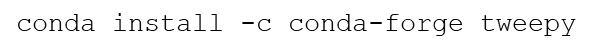

### Importação do pacote tweepy 

**<font color='red'>SEMPRE é necessário importar</font>**  o(s) pacote(s) que serão usados no seu script.

Vamos importar os pacotes que precisaremos usar nessa aplicação: TextBlob, Tweepy e NumPy
Tenha certeza que todos os pacotes foram previamente instalados. 

In [1]:
#Importação de pacotes

import tweepy


### Credenciais para utilização da API do Twitter

Para utilizar a API do twitter, é necessário ter uma conta no twitter, solicitar o acesso de desenvolvedor, criar sua aplicação, gerar suas credenciais.
* Veja vídeo explicativo "*APIs e coleta de dados*": https://igti.instructure.com/courses/2939/pages/apis-e-coleta-de-dados-2?module_item_id=194528

In [2]:
# Credenciais para utilização da API do Twitter

consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

Fazer a autenticação na API usando suas credenciais

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
token = tweepy.API(auth)

### Realizar a busca por palavra chave.

In [4]:
#Definir que palavra deseja pesquisar no Twitter
#keyword = 'covid-19'
keyword = ('home office OR trabalho remoto OR trabalho em casa OR homeoffice OR trabalhoremoto OR trabalhoemcasa')

In [11]:
tweets = token.search(q=keyword,count=100,result_type='mixed')

In [13]:
# Fazer a busca por palavra chave

# result_type --> mixed (default), recent, popular
#tweets --> variável que irá armazenar todos os Tweets com a palavra escolhida na função search da API
i = 1
while i < 100:
    tweets += token.search(q=keyword,count=100,result_type='mixed')
    i += 1



**Observação:**

Fazer a busca por palavra chave, busca o text do tweet truncado:
* tweets = token.search(q=keyword,lang='pt')

Fazer a busca por palavra chave, busca o text do tweet por inteiro
* tweets = token.search(q=keyword,tweet_mode='extended')

In [14]:
# Para verificar a quantidade de tweets coletado use a função "len()"

print("Total de tweets coletados %s." % (len(tweets)))

Total de tweets coletados 10000.


In [7]:
#Podemos imprimir o nome do usuário (screen_name) e o texto do tweet

for tweet in tweets:
    print("Usuário: %s "% {tweet.user.screen_name})
    print("  Tweet: %s"  % {tweet.text})
    #print("  Tweet: %s"  % {tweet.full_text}) #No caso da busca em tweet_mode='extended'


Usuário: {'JasmynBeKnowing'} 
  Tweet: {'This woman on the news just said, imagine if there was a medication that reduced your chances of getting COVID by 5… https://t.co/A4WfncIX9G'}
Usuário: {'AndrewYang'} 
  Tweet: {'Trump calling COVID-19 the “Kung Flu” is stupid, racist and part of the reason he is losing this election in increa… https://t.co/2vDh2psPBb'}
Usuário: {'CNBCnow'} 
  Tweet: {'The Trump admin. plans to end federal funding and support for coronavirus testing sites at the end of this month,… https://t.co/SlXjay1M3f'}
Usuário: {'matchracer'} 
  Tweet: {'@DavidCornDC Maybe the dollars he got from China were actually covered in covid.......oh right the dollars were from Americans.'}
Usuário: {'pixiemenace'} 
  Tweet: {'RT @MollyJongFast: Is anyone surprised that the trump administration completely fucked up the response to coronavirus... twice'}
Usuário: {'MichaelSholler2'} 
  Tweet: {'RT @Dragonfly_Drama: It’s ‘Looking Pretty Dire – Pretty Apocalyptic’: Doctor says Texas CO

## <font color=blue>Análise de polaridade</font>

Para fazer a **análise de polaridade**, vamos usar a função *sentiment.polarity* do pacote *TextBlob*.

* A função *sentiment.polarity* retornará um número entre -1 e 1, onde quanto maior esse número, menos "chateada" a pessoa que postou está. 

Ou seja, quanto maior esse número mais positivo é o tweet. Podemos ainda considerar que a polaridade 0 (zero) pode indicar uma neutralidade do tweet.

In [15]:
#importa pacotes

from textblob import TextBlob as tb
import numpy as np

**Observação:** Lembre-se de instalar os pacotes primeiro.

In [16]:
#Variável que irá armazenar as polaridades
analysis = None

In [17]:
# Lista vazia para armazenar scores
tweets_score = [] 

In [18]:
for tweet in tweets:
    print('**',tweet.text)
    analysis = tb(tweet.text)
    polarity = analysis.sentiment.polarity
    tweets_score.append(polarity)


** Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do… https://t.co/rucQtFsXnu
** “O home office era pra ser trabalhar em casa, mas a verdade é que depois de umas 2 semanas, você percebe que você t… https://t.co/Q8MkBzoHI8
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** O lance de home office que ainda me dá contentamento é poder comer enquanto trabalho. Na vida sem ele eu ficaria pa… https://t.co/ZvNCYXLzDI
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** @candyferraz nossa home office ta sendo uma experiencia mt doida pra mim pq tem q ter mt discernimento pra separar… https://t.co/kCpKEcStvC
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do hom

** Internet aqui de casa amanhece ruim, já to de mau humor... qdo consigo conectar rola puxada de orelha da professora… https://t.co/mB2k0w1atF
** As pessoas acham q só pq tu está de home office tu não faz nada, q tu não fica cansado!! Mal sabem eles que trazer… https://t.co/VAiRAVZWW8
** Home office traz mudanças e desafios.
Home office é o trabalho remoto, uma realidade que aumenta cada vez mais em t… https://t.co/JhhWR0yowJ
** Voltei a trabalhar essa semana, de casa. Essa é minha primeira experiência com home office (sem contar a parte de i… https://t.co/6BCQKGKLhG
** @caio_ruviaro é aquele rolê, home office no começo é trabalhar em casa, depois de um tempo é morar no trabalho kkk
** Se estar derrotada antes das oito da noite é fazer home office corretamente eu sou a rainha do trabalho em casa
** To sem tempo nenhum de fazer as coisas aqui em casa, doidin pra arrumar o home studio o trabalho n deixa
** são raras as vezes que saio de casa (trabalho home office, sou privilegiada). sai

** @GGusTTaviN1 Burlando nada, fui no meu trabalho e to voltando pra casa 👍 eu faço home office mas as vezes preciso i… https://t.co/ke2pyS8v8F
** Work from Home!
👊🏻🤜🏻💥🤛🏻🤟🏻🚀
.
.
.
.
.
📎
#Work #Home #HomeOffice #HomeSweetHome #StayHome #FicaEmCasa #Trabalho #Casa… https://t.co/MLSrNfRCqj
** infelizmente, o banco tá me forçando a ir trabalhar presencialmente em interlagos, bem longe daqui de casa. as cond… https://t.co/0FSXbHtjDW
** Dica para melhorar a produtividade no home office: Separe os ambientes entre casa e trabalho.
Eu separando: sentado… https://t.co/w89Am8ObyQ
** peço licença no trabalho pra ficar em isolamento mas seguindo no home office: "😠😤😡🤬 precisamos de atestado, não 🚫 p… https://t.co/8Ew7a4H43F
** Coisas q eu me pergunto sobre o home-office: 
- ok, não precisa pagar VR e VT ... VA ??? A pessoa em casa vive de l… https://t.co/rpyTAP8dpu
** Tô esse tempo todo em casa de Home Office tranquila aí quando o meu chefe pede para ir no trabalho um dia a porra a… https://t.co/ApG

** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** Todo dia eu troco de roupa pro home office. Coloco a mesma roupa que usaria no trabalho presencial. Até perfume rs.… https://t.co/IKrkwan5Vw
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do ho

** RT @igornatusch: @manotelli (esse lance do teletrabalho é muito maluco também. tipo, a casa era, para inúmeras pessoas, o REFÚGIO das agrur…
** RT @alexpessanha5: É um absurdo a @TIMBrasil deixar o cliente uma semana (e contando) sem o serviço de banda larga em casa! Ñ consigo fazer…
** É um absurdo a @TIMBrasil deixar o cliente uma semana (e contando) sem o serviço de banda larga em casa! Ñ consigo… https://t.co/KR5Vcu1dJJ
** @carlavilhenaa A impressão que eu tenho é que o trabalho fora de casa, ainda que tivesse mais atividades para fazer… https://t.co/LXpO6BwPJr
** @manotelli (esse lance do teletrabalho é muito maluco também. tipo, a casa era, para inúmeras pessoas, o REFÚGIO da… https://t.co/5ftSxSPTo0
** @gugachacra Que se recupere, mas um pouco de justiça divina. Eu em home office há 92 dias, trabalho o dobro, dou co… https://t.co/ryjsTsWSU0
** @piratahostil @carlavilhenaa @silviolual Vou contar um caso que aconteceu comigo, eu prestava serviço para Home Dep… https://t.co/BMVX

** @CavillSquad Kkkkkkkkkk eu tô em casa mesmo e trabalho home office sempre kkkkk pra mim tá ótimo kkkkk
** @JoaoStocchero @mrufino13 Ok, pra um adulto os estudar e criar essa rotina que vc diz eu até concordo. Agora eu que… https://t.co/zWjOaP6gJT
** RT @igornatusch: @manotelli (esse lance do teletrabalho é muito maluco também. tipo, a casa era, para inúmeras pessoas, o REFÚGIO das agrur…
** RT @alexpessanha5: É um absurdo a @TIMBrasil deixar o cliente uma semana (e contando) sem o serviço de banda larga em casa! Ñ consigo fazer…
** É um absurdo a @TIMBrasil deixar o cliente uma semana (e contando) sem o serviço de banda larga em casa! Ñ consigo… https://t.co/KR5Vcu1dJJ
** @carlavilhenaa A impressão que eu tenho é que o trabalho fora de casa, ainda que tivesse mais atividades para fazer… https://t.co/LXpO6BwPJr
** @manotelli (esse lance do teletrabalho é muito maluco também. tipo, a casa era, para inúmeras pessoas, o REFÚGIO da… https://t.co/5ftSxSPTo0
** @gugachacra Que se recupere,

** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de h… https://t.co/6wowAEb92m
** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que

** Pq claro q é super necessário ter uma obra no meu quintal em meio a uma pandemia enquanto eu trabalho de home offic… https://t.co/OKizw8xorj
** procurando forças pra conseguir cuidar do neném, voltar ao trabalho em home office, ser responsável pela organizaçã… https://t.co/2TNDqwgbTJ
** Home office faz parte do futuro do trabalho. Essa modalidade vem conquistando cada vez mais adeptos, tanto entre as… https://t.co/FnmQN3U6zO
** A transmissão, que terá início às 16h, no canal da EJud no YouTube, debaterá as temáticas: “A sustentabilidade em c… https://t.co/aXooQIkqHt
** 💬 Com o isolamento social e o deslocamento do trabalho de muitas pessoas para Home Office, veio junto a Dor na Colu… https://t.co/VsPJc8bpK1
** @HMartins eu acho q o segredo nesses dias é fazer o urgente, e deixar o q é só importante pro dia seguinte. a gente… https://t.co/m5HDsGBXPL
** digamos que eventualmente a gente pare de se chocar com a fato da galera ter desistido de ficar em casa e todos os… https://t.co/fODr

** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de h… https://t.co/6wowAEb92m
** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que

** Minha mãe (grupo de risco) tá de home office sem nenhuma diferença no trabalho.

Todo santo dia ouço cliente ligand… https://t.co/cXtVxavbws
** pra tentar variar um pouco o home office cada dia eu trabalho em um canto diferente da casa 

na escrivaninha 
na c… https://t.co/ZSNKpwnrzC
** impressionante como meu colega de trabalho não se preocupa nem com o home office, chega de manhã até gravata eu pon… https://t.co/hRdXRenEpU
** eu amo ficar no quintal de casa! até em horário de trabalho hoje usufrui do home office no sol, ao lado das plantas… https://t.co/57lDfqGyIE
** @xgabryelax aqui é diferente
eu tô em home office e minha mãe/irmão querem que eu pare do nada pra fazer as coisas… https://t.co/mvEAmee14D
** @emersonbraz @pedromigao É a maior TV do interior inclusive. TV Rio Sul. E eu não tô em home office. Vou aí trabalh… https://t.co/y5lDVm3oqG
** 4 dicas para os #colaboradores, para ajudar na adaptação da nova rotina temporária.
1- Defina seu espaço de trabalh… https://t.co/KRnO

** @Dek_T200 @PedroPolenta @MarceloAdnet @MussumAlive Existe o trabalho em casa, ou home office em português usado aqui.
** @GGusTTaviN1 Burlando nada, fui no meu trabalho e to voltando pra casa 👍 eu faço home office mas as vezes preciso i… https://t.co/ke2pyS8v8F
** Work from Home!
👊🏻🤜🏻💥🤛🏻🤟🏻🚀
.
.
.
.
.
📎
#Work #Home #HomeOffice #HomeSweetHome #StayHome #FicaEmCasa #Trabalho #Casa… https://t.co/MLSrNfRCqj
** infelizmente, o banco tá me forçando a ir trabalhar presencialmente em interlagos, bem longe daqui de casa. as cond… https://t.co/0FSXbHtjDW
** Dica para melhorar a produtividade no home office: Separe os ambientes entre casa e trabalho.
Eu separando: sentado… https://t.co/w89Am8ObyQ
** peço licença no trabalho pra ficar em isolamento mas seguindo no home office: "😠😤😡🤬 precisamos de atestado, não 🚫 p… https://t.co/8Ew7a4H43F
** Coisas q eu me pergunto sobre o home-office: 
- ok, não precisa pagar VR e VT ... VA ??? A pessoa em casa vive de l… https://t.co/rpyTAP8dpu
** Tô esse temp

** peço licença no trabalho pra ficar em isolamento mas seguindo no home office: "😠😤😡🤬 precisamos de atestado, não 🚫 p… https://t.co/8Ew7a4H43F
** Coisas q eu me pergunto sobre o home-office: 
- ok, não precisa pagar VR e VT ... VA ??? A pessoa em casa vive de l… https://t.co/rpyTAP8dpu
** Tô esse tempo todo em casa de Home Office tranquila aí quando o meu chefe pede para ir no trabalho um dia a porra a… https://t.co/ApGlDA3V7x
** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o des

** Coisas q eu me pergunto sobre o home-office: 
- ok, não precisa pagar VR e VT ... VA ??? A pessoa em casa vive de l… https://t.co/rpyTAP8dpu
** Tô esse tempo todo em casa de Home Office tranquila aí quando o meu chefe pede para ir no trabalho um dia a porra a… https://t.co/ApGlDA3V7x
** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu 

** Que sensação estranha de começar um emprego novo total em home office. Não conhecer os colegas de trabalho. Não ter… https://t.co/GvlQVMpQ63
** Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do… https://t.co/rucQtFsXnu
** “O home office era pra ser trabalhar em casa, mas a verdade é que depois de umas 2 semanas, você percebe que você t… https://t.co/Q8MkBzoHI8
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** O lance de home office que ainda me dá contentamento é poder comer enquanto trabalho. Na vida sem ele eu ficaria pa… https://t.co/ZvNCYXLzDI
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** @candyferraz nossa home office ta sendo uma experiencia mt doida pra mim pq tem q ter mt discernimento pra separar… https://t.co/kCpK

** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de h… https://t.co/6wowAEb92m
** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que

** @Dek_T200 @PedroPolenta @MarceloAdnet @MussumAlive Existe o trabalho em casa, ou home office em português usado aqui.
** @GGusTTaviN1 Burlando nada, fui no meu trabalho e to voltando pra casa 👍 eu faço home office mas as vezes preciso i… https://t.co/ke2pyS8v8F
** Work from Home!
👊🏻🤜🏻💥🤛🏻🤟🏻🚀
.
.
.
.
.
📎
#Work #Home #HomeOffice #HomeSweetHome #StayHome #FicaEmCasa #Trabalho #Casa… https://t.co/MLSrNfRCqj
** infelizmente, o banco tá me forçando a ir trabalhar presencialmente em interlagos, bem longe daqui de casa. as cond… https://t.co/0FSXbHtjDW
** Dica para melhorar a produtividade no home office: Separe os ambientes entre casa e trabalho.
Eu separando: sentado… https://t.co/w89Am8ObyQ
** peço licença no trabalho pra ficar em isolamento mas seguindo no home office: "😠😤😡🤬 precisamos de atestado, não 🚫 p… https://t.co/8Ew7a4H43F
** Coisas q eu me pergunto sobre o home-office: 
- ok, não precisa pagar VR e VT ... VA ??? A pessoa em casa vive de l… https://t.co/rpyTAP8dpu
** Tô esse temp

** O foda de quando minha mãe não tá em casa é que meu home office não anda nem 10%, meus avós estão ficando muito dep… https://t.co/I8T44J3UJS
** Essa semana o meu trabalho me colocou em home office e se eu já me achava uma péssima comercial na agência, em casa… https://t.co/LdkCbmY9Op
** @Super_Cid Paz e tranquilidade @Super_Cid 😎 Trabalhar em casa, é sensacional! #HomeofficeVida E para continuar assi… https://t.co/yFwKWfpH9w
** Mano kkkk
Eu me queimei em casa estou trabalhando de home office então foi um acidente de trabalho, quero meus direitos kkk
** Pq claro q é super necessário ter uma obra no meu quintal em meio a uma pandemia enquanto eu trabalho de home offic… https://t.co/OKizw8xorj
** procurando forças pra conseguir cuidar do neném, voltar ao trabalho em home office, ser responsável pela organizaçã… https://t.co/2TNDqwgbTJ
** Home office faz parte do futuro do trabalho. Essa modalidade vem conquistando cada vez mais adeptos, tanto entre as… https://t.co/FnmQN3U6zO
** A tran

** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do… https://t.co/rucQtFsXnu
** como ser mais produtivo
Acho um ótimo assunto para quem trabalha em casa.
Afinal! trabalhar em casa não é nada fáci… https://t.co/NsGhneqK4u
** O trabalho remoto nem sempre é fácil, mas existem inúmeras ferramentas disponíveis para te ajudar a ter um dia de t… https://t.co/pMc7LLFbVs
** Essa pandemia está nos ensinando que serviços online e delivery são essenciais. Não é necessário sair de casa para… https://t.co/pxxiPt7nkP
** @veramagalhaes A minha vida é cheio de trabalho correria desde que vcs gritavam fique em casa eu estava se plantão… https://t.co/1mJUz

** peço licença no trabalho pra ficar em isolamento mas seguindo no home office: "😠😤😡🤬 precisamos de atestado, não 🚫 p… https://t.co/8Ew7a4H43F
** Coisas q eu me pergunto sobre o home-office: 
- ok, não precisa pagar VR e VT ... VA ??? A pessoa em casa vive de l… https://t.co/rpyTAP8dpu
** Tô esse tempo todo em casa de Home Office tranquila aí quando o meu chefe pede para ir no trabalho um dia a porra a… https://t.co/ApGlDA3V7x
** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o des

** A transmissão, que terá início às 16h, no canal da EJud no YouTube, debaterá as temáticas: “A sustentabilidade em c… https://t.co/aXooQIkqHt
** 💬 Com o isolamento social e o deslocamento do trabalho de muitas pessoas para Home Office, veio junto a Dor na Colu… https://t.co/VsPJc8bpK1
** @HMartins eu acho q o segredo nesses dias é fazer o urgente, e deixar o q é só importante pro dia seguinte. a gente… https://t.co/m5HDsGBXPL
** digamos que eventualmente a gente pare de se chocar com a fato da galera ter desistido de ficar em casa e todos os… https://t.co/fODrqLepp8
** @CavillSquad Kkkkkkkkkk eu tô em casa mesmo e trabalho home office sempre kkkkk pra mim tá ótimo kkkkk
** @JoaoStocchero @mrufino13 Ok, pra um adulto os estudar e criar essa rotina que vc diz eu até concordo. Agora eu que… https://t.co/zWjOaP6gJT
** RT @igornatusch: @manotelli (esse lance do teletrabalho é muito maluco também. tipo, a casa era, para inúmeras pessoas, o REFÚGIO das agrur…
** RT @alexpessanha5: É um absu

** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do ho

** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do ho

** RT @alexpessanha5: É um absurdo a @TIMBrasil deixar o cliente uma semana (e contando) sem o serviço de banda larga em casa! Ñ consigo fazer…
** É um absurdo a @TIMBrasil deixar o cliente uma semana (e contando) sem o serviço de banda larga em casa! Ñ consigo… https://t.co/KR5Vcu1dJJ
** @carlavilhenaa A impressão que eu tenho é que o trabalho fora de casa, ainda que tivesse mais atividades para fazer… https://t.co/LXpO6BwPJr
** @manotelli (esse lance do teletrabalho é muito maluco também. tipo, a casa era, para inúmeras pessoas, o REFÚGIO da… https://t.co/5ftSxSPTo0
** @gugachacra Que se recupere, mas um pouco de justiça divina. Eu em home office há 92 dias, trabalho o dobro, dou co… https://t.co/ryjsTsWSU0
** @piratahostil @carlavilhenaa @silviolual Vou contar um caso que aconteceu comigo, eu prestava serviço para Home Dep… https://t.co/BMVXYSCyLH
** Está trabalhando em casa porque a empresa mandou? Veja direitos e deveres https://t.co/jThr8thGV7 via @UOLEconomia @UOL
** Minha mãe (

** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de h… https://t.co/6wowAEb92m
** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que o microfone do teams tava desativado e dei um gritinho escroto pra assusta… https://t.co/3OzXmoQ3UE
** @Vezon_ a gente já gastava mais aqui mesmo já que ele já fazia mta home e bem eu trabalho na nosso ecommerce em cas… https://t.co/OiOvFgChy3
** O trabalho é home office..mas o rolê é presencial. Egoísmo do caralho. Muitos que estão expostos gostariam de se re… https://t.co/DFHk

** @xgabryelax aqui é diferente
eu tô em home office e minha mãe/irmão querem que eu pare do nada pra fazer as coisas… https://t.co/mvEAmee14D
** @emersonbraz @pedromigao É a maior TV do interior inclusive. TV Rio Sul. E eu não tô em home office. Vou aí trabalh… https://t.co/y5lDVm3oqG
** 4 dicas para os #colaboradores, para ajudar na adaptação da nova rotina temporária.
1- Defina seu espaço de trabalh… https://t.co/KRnOzpZO7h
** @Eulavomeucarv @PedroPolenta @MarceloAdnet @MussumAlive Ah, entendi o que vc quis dizer: home office como sendo tra… https://t.co/fNFDwHEMev
** @Dek_T200 @PedroPolenta @MarceloAdnet @MussumAlive Existe o trabalho em casa, ou home office em português usado aqui.
** @GGusTTaviN1 Burlando nada, fui no meu trabalho e to voltando pra casa 👍 eu faço home office mas as vezes preciso i… https://t.co/ke2pyS8v8F
** Work from Home!
👊🏻🤜🏻💥🤛🏻🤟🏻🚀
.
.
.
.
.
📎
#Work #Home #HomeOffice #HomeSweetHome #StayHome #FicaEmCasa #Trabalho #Casa… https://t.co/MLSrNfRCqj
** infelizmente,

** Work from Home!
👊🏻🤜🏻💥🤛🏻🤟🏻🚀
.
.
.
.
.
📎
#Work #Home #HomeOffice #HomeSweetHome #StayHome #FicaEmCasa #Trabalho #Casa… https://t.co/MLSrNfRCqj
** infelizmente, o banco tá me forçando a ir trabalhar presencialmente em interlagos, bem longe daqui de casa. as cond… https://t.co/0FSXbHtjDW
** Dica para melhorar a produtividade no home office: Separe os ambientes entre casa e trabalho.
Eu separando: sentado… https://t.co/w89Am8ObyQ
** peço licença no trabalho pra ficar em isolamento mas seguindo no home office: "😠😤😡🤬 precisamos de atestado, não 🚫 p… https://t.co/8Ew7a4H43F
** Coisas q eu me pergunto sobre o home-office: 
- ok, não precisa pagar VR e VT ... VA ??? A pessoa em casa vive de l… https://t.co/rpyTAP8dpu
** Tô esse tempo todo em casa de Home Office tranquila aí quando o meu chefe pede para ir no trabalho um dia a porra a… https://t.co/ApGlDA3V7x
** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home

** peço licença no trabalho pra ficar em isolamento mas seguindo no home office: "😠😤😡🤬 precisamos de atestado, não 🚫 p… https://t.co/8Ew7a4H43F
** Coisas q eu me pergunto sobre o home-office: 
- ok, não precisa pagar VR e VT ... VA ??? A pessoa em casa vive de l… https://t.co/rpyTAP8dpu
** Tô esse tempo todo em casa de Home Office tranquila aí quando o meu chefe pede para ir no trabalho um dia a porra a… https://t.co/ApGlDA3V7x
** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o des

** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de h… https://t.co/6wowAEb92m
** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que o microfone do teams tava desativado e dei um gritinho escroto pra assusta… https://t.co/3OzXmoQ3UE
*

** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que o microfone do teams tava desativado e dei um gritinho escroto pra assusta… https://t.co/3OzXmoQ3UE
** @Vezon_ a gente já gastava mais aqui mesmo já que ele já fazia mta home e bem eu trabalho na nosso ecommerce em cas… https://t.co/OiOvFgChy3
** O trabalho é home office..mas o rolê é presencial. Egoísmo do caralho. Muitos que estão expostos gostariam de se re… https://t.co/DFHk6mwxgL
** #trabalhe #em #casa #de #arquitetura #timedasestrelas #home #estude #saude #decor #brasil #canada #decoracao… https://t.co/JqtM498pBT
** #trabalhe #em #casa #de #arquitetura #timedasestrelas #home #estude #saude #decor #brasil #canada #decoracao… https://t.co/skdZZrit47
** Que beleza home office. Vc acaba o trabalho e JÁ ESTÁ EM CASA.
** Que sensação estranha de começar um emprego novo total em home office. Não conhec

** pra tentar variar um pouco o home office cada dia eu trabalho em um canto diferente da casa 

na escrivaninha 
na c… https://t.co/ZSNKpwnrzC
** impressionante como meu colega de trabalho não se preocupa nem com o home office, chega de manhã até gravata eu pon… https://t.co/hRdXRenEpU
** eu amo ficar no quintal de casa! até em horário de trabalho hoje usufrui do home office no sol, ao lado das plantas… https://t.co/57lDfqGyIE
** @xgabryelax aqui é diferente
eu tô em home office e minha mãe/irmão querem que eu pare do nada pra fazer as coisas… https://t.co/mvEAmee14D
** @emersonbraz @pedromigao É a maior TV do interior inclusive. TV Rio Sul. E eu não tô em home office. Vou aí trabalh… https://t.co/y5lDVm3oqG
** 4 dicas para os #colaboradores, para ajudar na adaptação da nova rotina temporária.
1- Defina seu espaço de trabalh… https://t.co/KRnOzpZO7h
** @Eulavomeucarv @PedroPolenta @MarceloAdnet @MussumAlive Ah, entendi o que vc quis dizer: home office como sendo tra… https://t.co/fNFD

** O foda de quando minha mãe não tá em casa é que meu home office não anda nem 10%, meus avós estão ficando muito dep… https://t.co/I8T44J3UJS
** Essa semana o meu trabalho me colocou em home office e se eu já me achava uma péssima comercial na agência, em casa… https://t.co/LdkCbmY9Op
** @Super_Cid Paz e tranquilidade @Super_Cid 😎 Trabalhar em casa, é sensacional! #HomeofficeVida E para continuar assi… https://t.co/yFwKWfpH9w
** Mano kkkk
Eu me queimei em casa estou trabalhando de home office então foi um acidente de trabalho, quero meus direitos kkk
** Pq claro q é super necessário ter uma obra no meu quintal em meio a uma pandemia enquanto eu trabalho de home offic… https://t.co/OKizw8xorj
** procurando forças pra conseguir cuidar do neném, voltar ao trabalho em home office, ser responsável pela organizaçã… https://t.co/2TNDqwgbTJ
** Home office faz parte do futuro do trabalho. Essa modalidade vem conquistando cada vez mais adeptos, tanto entre as… https://t.co/FnmQN3U6zO
** A tran

** Trabalho em Casa - Dicas de Como Melhorar a Produtividade em Home Office - https://t.co/iomO4HEhvT
** Pesquisa do trabalho sobre home office e o povo falando que economizou com comida. Gente, cês não fazem compra e comida em casa não?
** RT @letyciavinaud: primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de home o…
** RT @betogebara: Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de h… https://t.co/6wowAEb92m
** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que

** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de h… https://t.co/6wowAEb92m
** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que o microfone do teams tava desativado e dei um gritinho escroto pra assusta… https://t.co/3OzXmoQ3UE
** @Vezon_ a gente já gastava mais aqui mesmo já que ele já fazia mta home e bem eu trabalho na nosso ecommerce em cas… https://t.co/OiOvFgChy3
** O trabalho é home office..mas o rolê é presencial. Egoísmo do caralho. Muitos que estão expostos gostariam de se re… https://t.co/DFHk6mwxgL
** #trabalhe #em #casa #de #arquitetura #timedasestrelas #home #estude #saude #decor #brasil #canada #decoracao… https://t.co/JqtM498pBT


** @emersonbraz @pedromigao É a maior TV do interior inclusive. TV Rio Sul. E eu não tô em home office. Vou aí trabalh… https://t.co/y5lDVm3oqG
** 4 dicas para os #colaboradores, para ajudar na adaptação da nova rotina temporária.
1- Defina seu espaço de trabalh… https://t.co/KRnOzpZO7h
** @Eulavomeucarv @PedroPolenta @MarceloAdnet @MussumAlive Ah, entendi o que vc quis dizer: home office como sendo tra… https://t.co/fNFDwHEMev
** @Dek_T200 @PedroPolenta @MarceloAdnet @MussumAlive Existe o trabalho em casa, ou home office em português usado aqui.
** @GGusTTaviN1 Burlando nada, fui no meu trabalho e to voltando pra casa 👍 eu faço home office mas as vezes preciso i… https://t.co/ke2pyS8v8F
** Work from Home!
👊🏻🤜🏻💥🤛🏻🤟🏻🚀
.
.
.
.
.
📎
#Work #Home #HomeOffice #HomeSweetHome #StayHome #FicaEmCasa #Trabalho #Casa… https://t.co/MLSrNfRCqj
** infelizmente, o banco tá me forçando a ir trabalhar presencialmente em interlagos, bem longe daqui de casa. as cond… https://t.co/0FSXbHtjDW
** Dica para me

** #trabalhe #em #casa #de #arquitetura #timedasestrelas #home #estude #saude #decor #brasil #canada #decoracao… https://t.co/JqtM498pBT
** #trabalhe #em #casa #de #arquitetura #timedasestrelas #home #estude #saude #decor #brasil #canada #decoracao… https://t.co/skdZZrit47
** Que beleza home office. Vc acaba o trabalho e JÁ ESTÁ EM CASA.
** Que sensação estranha de começar um emprego novo total em home office. Não conhecer os colegas de trabalho. Não ter… https://t.co/GvlQVMpQ63
** Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do… https://t.co/rucQtFsXnu
** “O home office era pra ser trabalhar em casa, mas a verdade é que depois de umas 2 semanas, você percebe que você t… https://t.co/Q8MkBzoHI8
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** O lance de home office que ainda me dá contentamento é poder comer enquanto traba

** Vantagens do home office: a população em São Paulo perde em média 3h no transporte entre casa e trabalho. Isso equi… https://t.co/AGndSB3jfe
** Durante épocas normais eu pensava que se morasse perto do trabalho iria cochilar em casa de vez em quando, agora em… https://t.co/q8OBMISXSI
** O trabalho em casa nem sempre é tão estruturado como no escritório, mas isso pode mudar. Invista em bons itens para… https://t.co/D2SbO8X4Vg
** O foda de quando minha mãe não tá em casa é que meu home office não anda nem 10%, meus avós estão ficando muito dep… https://t.co/I8T44J3UJS
** Essa semana o meu trabalho me colocou em home office e se eu já me achava uma péssima comercial na agência, em casa… https://t.co/LdkCbmY9Op
** @Super_Cid Paz e tranquilidade @Super_Cid 😎 Trabalhar em casa, é sensacional! #HomeofficeVida E para continuar assi… https://t.co/yFwKWfpH9w
** Mano kkkk
Eu me queimei em casa estou trabalhando de home office então foi um acidente de trabalho, quero meus direitos kkk
** Pq cla

** como ser mais produtivo
Acho um ótimo assunto para quem trabalha em casa.
Afinal! trabalhar em casa não é nada fáci… https://t.co/NsGhneqK4u
** O trabalho remoto nem sempre é fácil, mas existem inúmeras ferramentas disponíveis para te ajudar a ter um dia de t… https://t.co/pMc7LLFbVs
** Essa pandemia está nos ensinando que serviços online e delivery são essenciais. Não é necessário sair de casa para… https://t.co/pxxiPt7nkP
** @veramagalhaes A minha vida é cheio de trabalho correria desde que vcs gritavam fique em casa eu estava se plantão… https://t.co/1mJUzUuB9Q
** Ainda bem que temos bastante trabalho, dia 105, home office online!
#aindabemque #homeoffice #emcasa… https://t.co/cgHw9kGdmM
** Graças a deus trabalho hj nao podia passar mais um dia em casa, fico cada vez mais maluco doente da cabeça aqui den… https://t.co/HpXxuRuppT
** Trabalhar remoto fora de casa é algo possível!
A Outoo mapeia locais por toda a cidade, 
Saiba mais em:… https://t.co/PB7ioHnNLr
** @samlafraria Tem u

** @Vezon_ a gente já gastava mais aqui mesmo já que ele já fazia mta home e bem eu trabalho na nosso ecommerce em cas… https://t.co/OiOvFgChy3
** O trabalho é home office..mas o rolê é presencial. Egoísmo do caralho. Muitos que estão expostos gostariam de se re… https://t.co/DFHk6mwxgL
** #trabalhe #em #casa #de #arquitetura #timedasestrelas #home #estude #saude #decor #brasil #canada #decoracao… https://t.co/JqtM498pBT
** #trabalhe #em #casa #de #arquitetura #timedasestrelas #home #estude #saude #decor #brasil #canada #decoracao… https://t.co/skdZZrit47
** Que beleza home office. Vc acaba o trabalho e JÁ ESTÁ EM CASA.
** Que sensação estranha de começar um emprego novo total em home office. Não conhecer os colegas de trabalho. Não ter… https://t.co/GvlQVMpQ63
** Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do… https://t.co/rucQtFsXnu
** “O home office era pra ser trabalhar em casa, mas a verdade é que depois de umas 

** Que beleza home office. Vc acaba o trabalho e JÁ ESTÁ EM CASA.
** Que sensação estranha de começar um emprego novo total em home office. Não conhecer os colegas de trabalho. Não ter… https://t.co/GvlQVMpQ63
** Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do… https://t.co/rucQtFsXnu
** “O home office era pra ser trabalhar em casa, mas a verdade é que depois de umas 2 semanas, você percebe que você t… https://t.co/Q8MkBzoHI8
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** O lance de home office que ainda me dá contentamento é poder comer enquanto trabalho. Na vida sem ele eu ficaria pa… https://t.co/ZvNCYXLzDI
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** @candyferraz nossa home office ta sendo uma experiencia mt doida pr

** Que beleza home office. Vc acaba o trabalho e JÁ ESTÁ EM CASA.
** Que sensação estranha de começar um emprego novo total em home office. Não conhecer os colegas de trabalho. Não ter… https://t.co/GvlQVMpQ63
** Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do… https://t.co/rucQtFsXnu
** “O home office era pra ser trabalhar em casa, mas a verdade é que depois de umas 2 semanas, você percebe que você t… https://t.co/Q8MkBzoHI8
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** O lance de home office que ainda me dá contentamento é poder comer enquanto trabalho. Na vida sem ele eu ficaria pa… https://t.co/ZvNCYXLzDI
** RT @usponline: Trabalhar em casa não é tão fácil quanto parece. Ansiedade, solidão e sobrecarga de serviço são algumas sequelas do home off…
** @candyferraz nossa home office ta sendo uma experiencia mt doida pr

Nesse projeto o briefing era para ter em casa um espaço…
** @Marginalx11 VOu dizer q o pior é o desanimo da faculdade ter parado (Nao tem EAD) entao nao sei quando me formo e… https://t.co/mHmCnbltL4
** primeiras semanas home office: nossa eu sou bem mais produtiva em casa, o trabalho rende muito mais! 

4 meses de h… https://t.co/6wowAEb92m
** Home office pré-covid
.💻
#Repost siga @GebaraFilartiga
• • • • • •

Nesse projeto o briefing era para ter em casa u… https://t.co/KEdWsTVafq
** e eu que tava no home office achando que o microfone do teams tava desativado e dei um gritinho escroto pra assusta… https://t.co/3OzXmoQ3UE
** @Vezon_ a gente já gastava mais aqui mesmo já que ele já fazia mta home e bem eu trabalho na nosso ecommerce em cas… https://t.co/OiOvFgChy3
** O trabalho é home office..mas o rolê é presencial. Egoísmo do caralho. Muitos que estão expostos gostariam de se re… https://t.co/DFHk6mwxgL
** #trabalhe #em #casa #de #arquitetura #timedasestrelas #home #estude #saude #d

In [19]:
print('Vetor de polaridade:',tweets_score)

Vetor de polaridade: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.03333333333333333, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.03333333333333333, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [20]:
print('MÉDIA DE SENTIMENTO: ' + str(np.mean(tweets_score))) #a função mean() pertence ao pacote numpy

MÉDIA DE SENTIMENTO: 0.013666666666666666


In [23]:
np.mean(tweets_score)

0.013666666666666666

In [33]:
valores = [8,3,4,8,3,4,3,2,0,8]
np.mean(valores)

4.3

##### Análise de polaridade para tweets que não foram postados em inglês.

In [24]:
polarities = []

for tweet in tweets: #para cada tweet 
    analysis = tb(tweet.text)  # tweet.full_text para modo extendido
    
    if analysis.detect_language() != 'en': #verifica se o tweet esta em inglês, se não estiver, vai traduzir

        traducao = tb(str(analysis.translate(to='en')))
        
        print('Texto traduzido %s: ' % traducao)
        
        polarity = traducao.sentiment.polarity
    else:
        polarity = analysis.sentiment.polarity
    
    polarities.append(polarity)
    

Texto traduzido Working from home is not as easy as it sounds. Anxiety, loneliness and service overload are some sequels of… https://t.co/rucQtFsXnu: 
Texto traduzido “The home office was supposed to be working at home, but the truth is that after about 2 weeks, you realize that you have… https://t.co/Q8MkBzoHI8: 
Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido The home office thing that still gives me contentment is being able to eat while working. In life without him I would be pa… https://t.co/ZvNCYXLzDI: 
Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido @candyferraz our home office is being a very crazy experience for me because you have to have a lot of insight to separate… https://t.co/kCpKEcStvC: 
Texto traduzido RT @usponline: Workin

Texto traduzido Because of course it is super necessary to have a work in my backyard in the middle of a pandemic while I work from home offic… https://t.co/OKizw8xorj: 
Texto traduzido looking for strength to be able to take care of the baby, return to work at home office, be responsible for the organization… https://t.co/2TNDqwgbTJ: 
Texto traduzido Home office is part of the future of work. This modality is gaining more and more fans, both among the… https://t.co/FnmQN3U6zO: 
Texto traduzido The broadcast, which will start at 4 pm, on the EJud YouTube channel, will discuss the themes: “Sustainability in… https://t.co/aXooQIkqHt: 
Texto traduzido 💬 With the social isolation and the displacement of many people's work to the Home Office, came along with Dor na Colu… https://t.co/VsPJc8bpK1: 
Texto traduzido @HMartins I think the secret these days is to do the urgent, and leaving the q is only important for the next day. we… https://t.co/m5HDsGBXPL: 
Texto traduzido let's say that event

Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido Every day I change clothes for the home office. I put on the same clothes that I would use for face-to-face work. Even perfume rs… https://t.co/IKrkwan5Vw: 
Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido RT @usponline: Working fro

Texto traduzido RT @ alexpessanha5: It is absurd for @TIMBrasil to leave the customer for a week (and counting) without broadband service at home! I can't do it ...: 
Texto traduzido It is absurd for @TIMBrasil to leave the customer for a week (and counting) without broadband service at home! I can't… https://t.co/KR5Vcu1dJJ: 
Texto traduzido @carlavilhenaa The impression I have is that working outside the home, even though I had more activities to do… https://t.co/LXpO6BwPJr: 
Texto traduzido @manotelli (this thing about teleworking is very crazy too. like, the house was, for countless people, the REFUGE of… https://t.co/5ftSxSPTo0: 
Texto traduzido @gugachacra May it recover, but a little divine justice. I have been in my home office for 92 days, I work twice as much, I give… https://t.co/ryjsTsWSU0: 
Texto traduzido @piratahostil @carlavilhenaa @silviolual I'm going to tell you about a case that happened to me, I was working for Home Dep… https://t.co/BMVXYSCyLH: 
Texto traduzido Ar

Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido RT @usponline: Working from home is not as easy as it looks. Anxiety, loneliness and overload of service are some sequels of the home off…: 
Texto traduzido Working from home is not as easy as it sounds. Anxiety, loneliness and service overload are some sequels of… https://t.co/rucQtFsXnu: 
Texto traduzido how to be more productive
I think it's a great subject for those who work at home.
After all! working from home is not easy… https://t.co/NsGhneqK4u: 
Texto traduzido Remote work is not always easy, but there are numerous tools available to help you have a day of t… https://t.co/pMc7LLFbVs: 
Texto traduzido This pandemic is teaching us that online services and

Texto traduzido to try to vary the home office a little bit each day I work in a different corner of the house

on the desk
na c… https://t.co/ZSNKpwnrzC: 
Texto traduzido impressive how my co-worker doesn't even care about the home office, he arrives in the morning until I tie a tie… https://t.co/hRdXRenEpU: 
Texto traduzido i love staying in the backyard! even during work hours today he enjoys the home office in the sun, next to the plants… https://t.co/57lDfqGyIE: 
Texto traduzido @xgabryelax here is different
I'm at home office and my mom / brother want me to stop nowhere to do things… https://t.co/mvEAmee14D: 
Texto traduzido @emersonbraz @pedromigao It is the biggest TV in the interior including. Rio Sul TV. And I'm not at home. I'm going to work… https://t.co/y5lDVm3oqG: 
Texto traduzido 4 tips for # collaborators, to help adapt the new temporary routine.
1- Define your workspace… https://t.co/KRnOzpZO7h: 
Texto traduzido @Eulavomeucarv @PedroPolenta @MarceloAdnet @MussumAlive A

Texto traduzido @veramagalhaes My life is full of work I would run since you guys shouted stay at home I was on duty… https://t.co/1mJUzUuB9Q: 
Texto traduzido Good thing we have a lot of work, day 105, home office online!
#aindabemque #homeoffice # emcasa… https://t.co/cgHw9kGdmM: 
Texto traduzido Thank god work today I couldn't spend another day at home, I get more and more crazy sick in the head here in… https://t.co/HpXxuRuppT: 
Texto traduzido Remote working outside the home is possible!
Outoo maps locations across the city,
Find out more at:… https://t.co/PB7ioHnNLr: 
Texto traduzido @samlafraria There are people from work who are transiting the home office between home in Recife and beach house (… https://t.co/MCis39CXpE: 
Texto traduzido The worst part about being in the home office and one of the clients having my phone number is that they think they can ma… https://t.co/HPaU6f7XSC: 
Texto traduzido my fear is that my head goes short and that I start associating leaving home w

Texto traduzido @ Dek_T200 @PedroPolenta @MarceloAdnet @MussumAlive There is work at home, or home office in Portuguese used here.: 
Texto traduzido @ GGusTTaviN1 Cheating nothing, I went to my job and I'm going home 👍 I do home office but sometimes I need to… https://t.co/ke2pyS8v8F: 
Texto traduzido Work from Home!
👊🏻🤜🏻💥🤛🏻🤟🏻🚀
.
.
.
.
.
📎
#Work #Home #HomeOffice #HomeSweetHome #StayHome #FicaEmCasa #Trabalho # Casa… https://t.co/MLSrNfRCqj: 
Texto traduzido unfortunately, the bank is forcing me to go to work in person at interlagos, a long way from here. the conditions… https://t.co/0FSXbHtjDW: 
Texto traduzido Tip to improve productivity in the home office: Separate the environments between home and work.
Me separating: sitting… https://t.co/w89Am8ObyQ: 
Texto traduzido I ask for leave at work to stay in isolation but following at the home office: "😠😤😡🤬 we need a certificate, no 🚫 p… https://t.co/8Ew7a4H43F: 
Texto traduzido Things I ask myself about the home-office:
- ok, no need to

Texto traduzido @itfalida I always hated Home Office, my mind bought it with the idea that the house is the resting place and the esc… https://t.co/9NLlnS8ctm: 
Texto traduzido I have been working at least every day for at least 1 month without a break. Sunday to Sunday, without a day to do anything.

Ma… https://t.co/XZrUVDYS4X: 
Texto traduzido Internet here at home dawns bad, I'm already in a bad mood ... when I can connect the teacher 's ear with a roll ... https://t.co/mB2k0w1atF: 
Texto traduzido People think it's just because you're from home office, you don't do anything, you don't get tired !! Little do they know what to bring… https://t.co/VAiRAVZWW8: 
Texto traduzido Home office brings changes and challenges.
Home office is remote work, a reality that grows more and more in t… https://t.co/JhhWR0yowJ: 
Texto traduzido I went back to work this week, from home. This is my first experience with home office (not to mention the part of i… https://t.co/6BCQKGKLhG: 
Texto traduzido

Texto traduzido Work at Home - Tips on How to Improve Productivity in Home Office - https://t.co/iomO4HEhvT: 
Texto traduzido Home office job search and people saying they saved on food. Guys, you don’t buy food at home?: 
Texto traduzido RT @letyciavinaud: first weeks home office: wow, I'm much more productive at home, work pays a lot more!

4 months home o ...: 
Texto traduzido RT @betogebara: Pre-covid home office
.💻
#Repost follow @GebaraFilartiga
• • • • • •

In this project the briefing was to have a space at home ...: 
Texto traduzido @ Marginalx11 I will say that the worst is the discouragement of the college to have stopped (There is no distance education) so I don't know when I graduate and… https://t.co/mHmCnbltL4: 
Texto traduzido first weeks home office: wow i'm much more productive at home, work pays a lot more!

4 months ago… https://t.co/6wowAEb92m: 
Texto traduzido Pre-covid home office
.💻
#Repost follow @GebaraFilartiga
• • • • • •

In this project the briefing was to

HTTPError: HTTP Error 429: Too Many Requests

In [25]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [0.43333333333333335, 0.0, 0.43333333333333335, 0.5, 0.43333333333333335, -0.78, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.0, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.36388888888888893, 0.18333333333333335, 0.0, 0.35, 0.875, -0.07857142857142857, 0.1, 0.0, -1.0, 0.0, 0.4444444444444444, -0.9, -0.3, -0.6999999999999998, -0.40625, 0.3, 0.125, 0.0, 0.0, 0.0, 0.15, 0.0, 0.2, -0.07142857142857142, -0.22499999999999998, 0.15, 0.7, -0.4, -0.5, 0.7500000000000001, 0.0, 0.1111111111111111, 0.35, 0.3333333333333333, 0.0, 0.26666666666666666, 0.0, -0.7, 0.8, 0.3, -0.39, -0.625, -0.625, 0.25, -0.39, 0.0062500000000000056, 0.0, 0.0, -0.07142857142857142, -0.09375, 1.0, 0.3125, 0.0, 0.0, 0.13636363636363635, 0.0, 0.0, 0.0, 0.0, -0.275, 0.0, 0.0, 0

In [26]:
print('MÉDIA DE SENTIMENTO: ' + str(np.mean(polarities)))

MÉDIA DE SENTIMENTO: 0.09265089292705574


## <font color=blue>Armazenar o tweets coletados</font> 

Até aqui, nós criamos nossa autenticação e já temos acesso aos tweets coletados.
Agora vamos armazenar nossos tweets.

##### Armazenar em arquivos

In [27]:
#importa o pacote json

import json 

In [28]:
status = tweets[0]

#converte para string
json_str = json.dumps(status._json)

#deserialise string para um objeto python
parsed = json.loads(json_str)

In [29]:
type(tweets)

tweepy.models.SearchResults

In [30]:
type(json_str)

str

In [31]:
type(parsed)

dict

Agora vamos deserializar os tweets e gravar no arquivo json.

**Observação:** Antes de executar o scrit, verifique se o caminho de gravação do arquivo definido na variável *datasetPath* existe.

In [32]:
datasetPath = 'C:\Bootcamp\Datasets\JSON'

with open(datasetPath+'\\tweets_keywords.json', 'a', encoding='utf8') as filename:    #aberto em mode de append
    
    for tweet in tweets: #para cada tweet no vetor de resultados tweets
        
        status = tweet
        
        #converte para string        
        json_str = json.dumps(status._json)
        
        #deserializa a string para um objeto python do tipo dict        
        parsed = json.loads(json_str)
        
        #grava o tweet deserializado no arquivo
        json.dump(parsed, filename, ensure_ascii=False, sort_keys=True, indent=4, separators=(',', ':'))

##### Armazenar no MongoDB

In [ ]:
#importa o pacote pymongo

import pymongo

In [ ]:
#Conexão ao banco de dados
con = pymongo.MongoClient('localhost', 27017)

#seleciona o banco de dados
db = con.twitterdb

In [ ]:
#seleciona a coleção para armazenar os tweets
collection = db.tweets_keywords

In [ ]:
#lista a quantidade de tweets existentes na coleção
db.tweets_keywords.count()

In [ ]:
#lista a quantidade de tweets existentes na coleção
db.tweets_keywords.count_documents({})

In [ ]:
i = 0
#para cada tweet no vetor de resultados tweets
for tweet in tweets:
    db.tweets_keywords.insert_one(tweet._json)
    i=i+1
    #print("Tweet inserido com sucesso !!")

In [ ]:
#lista a quantidade de tweets inseridos
print("Quantidade de tweets inseridos: %s" % i)

In [ ]:
#lista a quantidade de tweets existentes na coleção
db.tweets_keywords.count_documents({})